<a href="https://colab.research.google.com/github/ebudd45/Meteorologyclass/blob/main/reanalysis_sounding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install needed modules
!pip install metpy
!pip install siphon
!pip install sounderpy
!pip install cdsapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.5/400.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.6 MB/s eta 0:00:00
  Created wheel for cdsapi: filename=cdsapi-0.6.1-py2.py3-none-any.whl size=12008 sha256=6c54629f674d72a1fd09f9ed0683f85fbcb941d61ce02907908707188524956f
  Stored in directory: /root/.cache/pip/wheels/7c/63/08/45461d6f6636c1aba7846828d8c787a064073945048f76d44a
Successfully built cdsapi


In [17]:
import sounderpy as spy
import cdsapi

In [44]:
uid = 261492
apikey = "d49b15eb-e8f6-44e5-adee-63179d3f018e"

with open("/root/.cdsapirc", "w") as f:
    print("url: https://cds.climate.copernicus.eu/api/v2", file=f)
    print(f"key: {uid}:{apikey}", file=f)

In [45]:
#Set date and time
#raw_data = spy.get_model_data('rap-ruc', [40.49, -86.14], '2013', '11', '17', '18')
#raw_data = spy.get_model_data('ncep', [33.19, -87.46], '2011', '04', '27', '22')
raw_data = spy.get_model_data('era5', [33.19, -87.46], '2011', '04', '27', '22')

> ERA5 REANALYSIS DATA ACCESS FUNCTION --
------------------------------------------


2023-10-21 03:05:27,483 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-10-21 03:05:27,486 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-10-21 03:05:27,761 INFO Request is queued
INFO:cdsapi:Request is queued
2023-10-21 03:05:28,995 INFO Request is running
INFO:cdsapi:Request is running
2023-10-21 03:05:36,931 INFO Request is completed
INFO:cdsapi:Request is completed


> DATASET ACCESSED: reanalysis-era5-pressure-levels


2023-10-21 03:05:37,161 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-10-21 03:05:37,165 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-10-21 03:05:37,433 INFO Request is queued
INFO:cdsapi:Request is queued
2023-10-21 03:05:38,737 INFO Request is running
INFO:cdsapi:Request is running
2023-10-21 03:05:42,951 INFO Request is completed
INFO:cdsapi:Request is completed
2023-10-21 03:05:42,954 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data4/adaptor.mars.internal-1697857534.3316553-32461-15-946f9886-3d56-4e87-bca5-88bd9f57624b.nc to ./output.nc (10.7K)
INFO:cdsapi:Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data4/adaptor.mars.internal-1697857534.3316553-32461-15-946f9886-3d56-4e87-bca5-88bd9f57624b.nc to ./output

> DATASET ACCESSED: reanalysis-era5-single-levels


2023-10-21 03:05:44,615 INFO Download rate 6.5K/s
INFO:cdsapi:Download rate 6.5K/s
2023-10-21 03:05:44,619 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data0/adaptor.mars.internal-1697857540.828984-698-19-d169d176-b740-48aa-b9b9-8b8a0267ca6a.nc to ./output.nc (3.3K)
INFO:cdsapi:Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data0/adaptor.mars.internal-1697857540.828984-698-19-d169d176-b740-48aa-b9b9-8b8a0267ca6a.nc to ./output.nc (3.3K)
2023-10-21 03:05:46,377 INFO Download rate 1.9K/s
INFO:cdsapi:Download rate 1.9K/s


> COMPLETE --------
> RUNTIME: 00:00:23


In [46]:
clean_data = spy.parse_data(raw_data)

> ERA5 REANALYSIS DATA PARSE FUNCTION --
------------------------------------------
> COMPLETE --------
> RUNTIME: 00:00:00


/usr/local/lib/python3.10/dist-packages/sounderpy/sounderpy.py:908: UserWarning: Relative humidity >120%, ensure proper units.
  'vert_Td': (mpcalc.dewpoint_from_relative_humidity(


In [47]:
clean_data

{'T': array([ 22.28674316,  22.43306876,  20.83852069,  19.93437478,
         21.04494596,  19.38638109,  17.26645068,  15.48649455,
         14.11005694,  12.71996237,  11.21351503,   9.47576544,
          7.73801584,   6.08559245,   4.45706804,   2.95472028,
          1.67737342,   0.40002656,  -1.2394994 ,  -2.98272998,
         -4.7270955 ,  -6.54850319,  -8.36991087, -10.18876606,
        -11.95425022, -13.71973437, -15.48521852, -17.20181558,
        -18.9087367 , -20.61565782, -22.29986191, -23.93686809,
        -25.57387426, -27.21088044, -28.85875909, -30.52030356,
        -32.18184802, -33.84339249, -35.52383079, -37.40439451,
        -39.28495823, -41.16552195, -43.04608567, -44.91727324,
        -46.71520775, -48.51314225, -50.32873394, -52.18056872,
        -54.0324035 , -55.90651413, -57.83550304, -59.76449196,
        -61.69348088, -63.42511199, -65.143216  , -66.86132   ,
        -68.24722928, -68.15021654, -68.05320379, -67.95619104,
        -67.8591783 , -68.48114955,

> SOUNDING PLOTTER FUNCTION --
---------------------------------
> COMPLETE --------
> RUNTIME: 00:00:03


/usr/local/lib/python3.10/dist-packages/sounderpy/sounderpy.py:1774: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


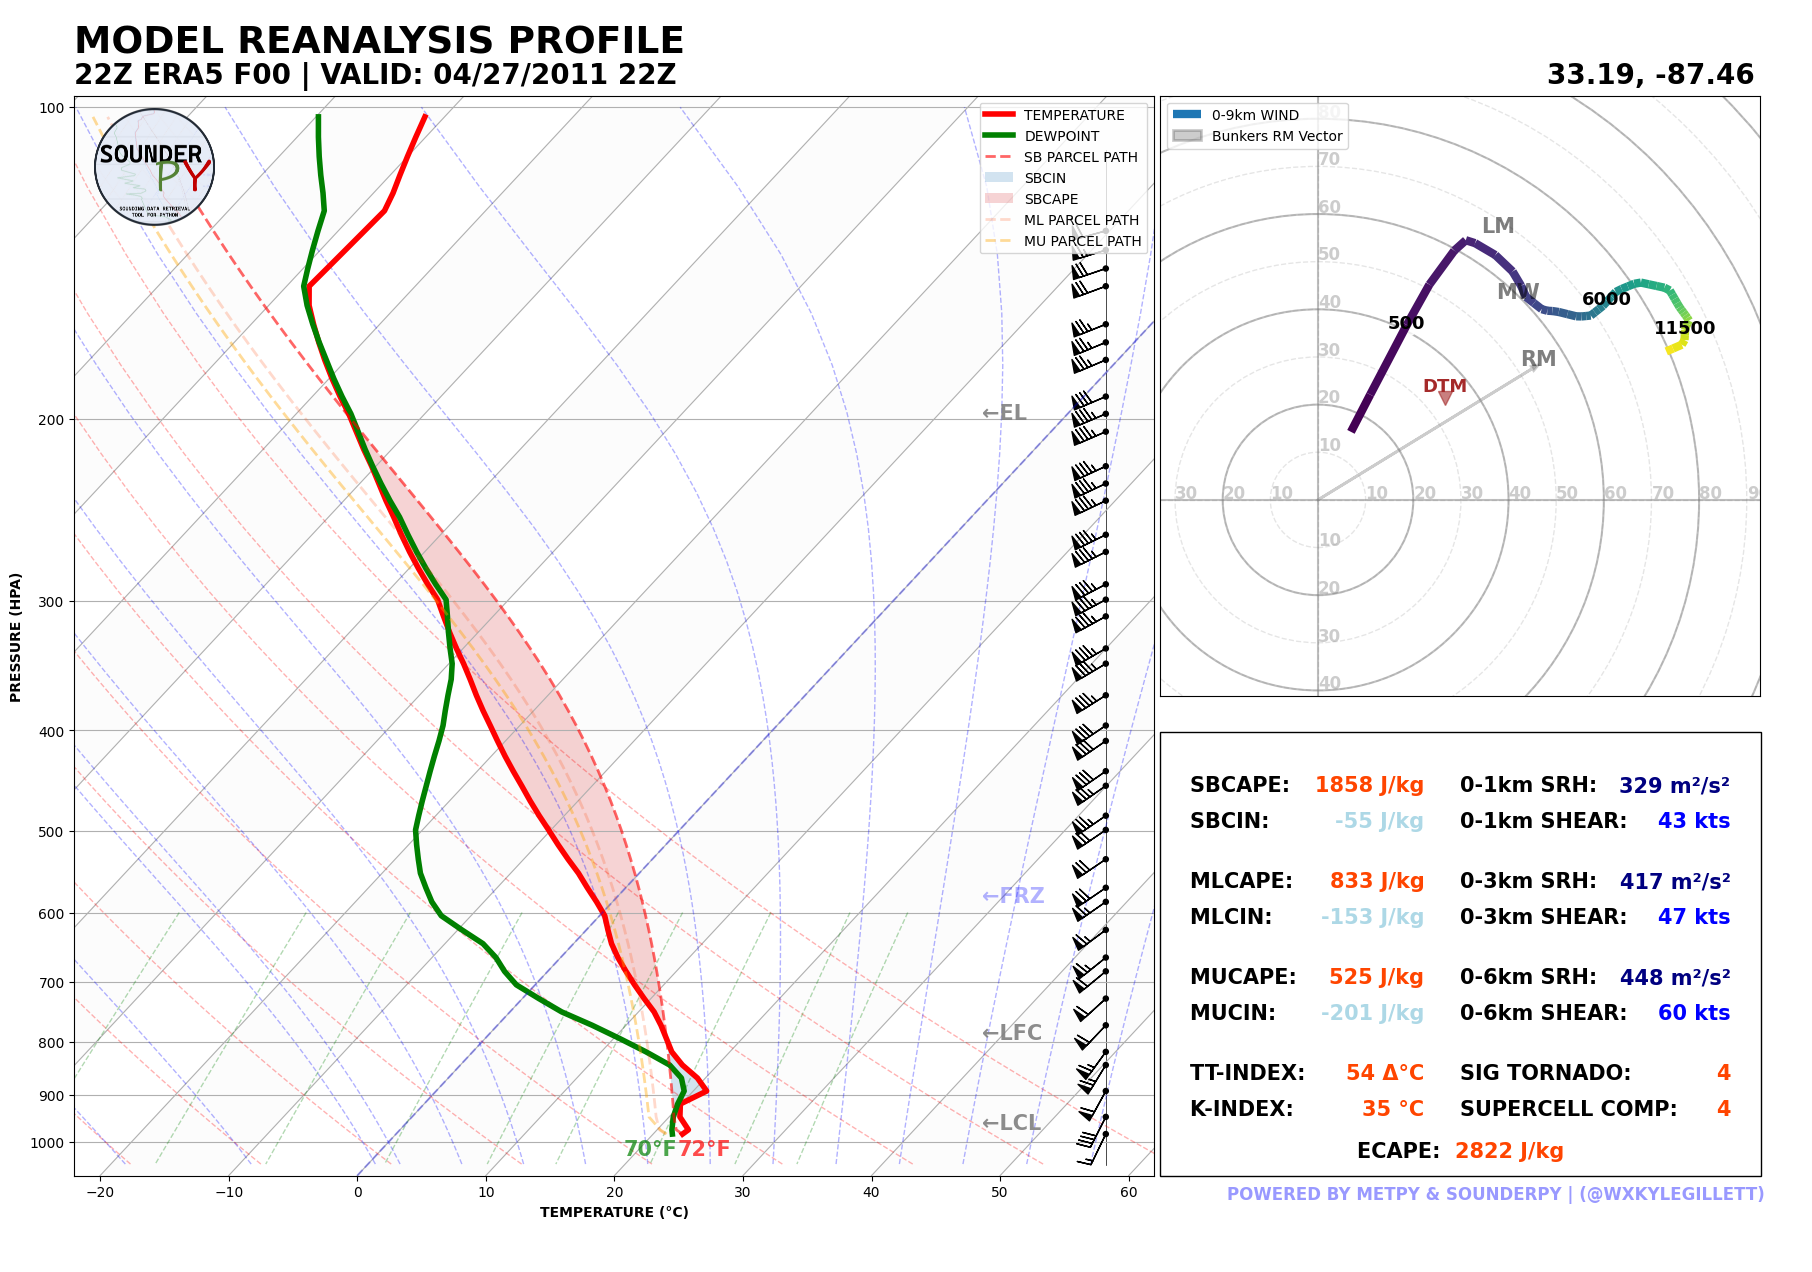

In [48]:
#Create sounding
spy.metpy_sounding(clean_data, 'show')